In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, measure, morphology
reg_path = "Assignment/data/RESISTORS/"
# Load the image
image_path = reg_path+'RESISTORS-2.png'
def remove_resistor_background(image_path, output_path):
    image = Image.open(image_path)
    # Convert to RGBA
    image = image.convert('RGBA')
    # Convert the image to numpy array
    data = np.array(image)
    white_threshold = 240
    # Create a mask where white is set to True and the rest to False
    white_areas = (data[:,:,0] > white_threshold) \
                  & (data[:,:,1] > white_threshold) \
                  & (data[:,:,2] > white_threshold)
    # Set the alpha channel to 0 for all white areas (making them transparent)
    data[white_areas, -1] = 0
    # Convert the numpy array back to an image
    image_no_white = Image.fromarray(data)
    # Save the image without white background
    image_no_white.save(output_path)

# Set the path for the output image
output_path = 'RESISTORS_no_background.png'

# Call the function to remove the background
remove_resistor_background(image_path, output_path)

# Return the path to the output image
output_path


D:\ProgramData\Anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


'RESISTORS_no_background.png'

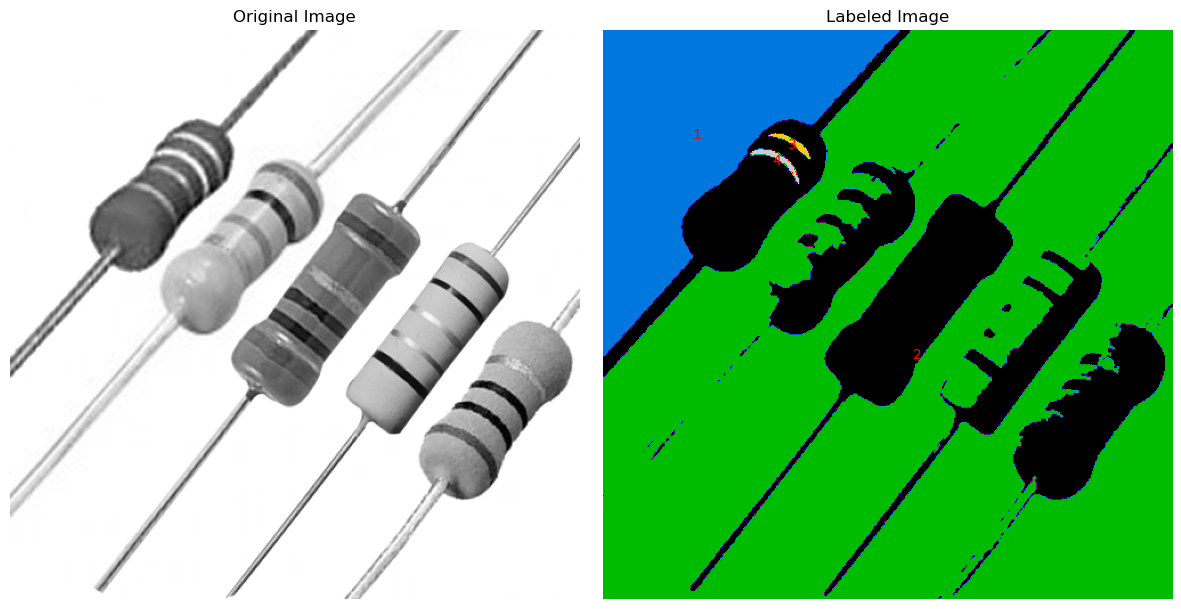

In [2]:
image = Image.open(output_path).convert('L')  # convert image to grayscale
image_np = np.array(image)

# Apply a Gaussian blur to the image to remove potential noise
blurred = filters.gaussian(image_np, sigma=1.0)

# Use a threshold to create a binary image, Otsu's method will find an optimal threshold
threshold = filters.threshold_otsu(blurred)
binary = blurred > threshold

# Remove small objects (noise) from the binary image
cleaned = morphology.remove_small_objects(binary, min_size=50)

# Label the image
labeled = measure.label(cleaned)
regions = measure.regionprops(labeled)

# Plot the original image and the labeled image side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image_np, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(labeled, cmap='nipy_spectral')
ax[1].set_title('Labeled Image')
ax[1].axis('off')

# Annotate the regions with their corresponding number
for props in regions:
    y0, x0 = props.centroid
    ax[1].text(x0, y0, props.label, ha='center', va='center',
                color='red')

plt.tight_layout()
plt.show()